IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import array 
import scipy.signal as signal
#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import seaborn as sns
from scipy.stats import zscore
from sklearn.multiclass import OneVsRestClassifier

# Model libraries
from sklearn.linear_model import LogisticRegression, SGDClassifier, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# remove warnings
import warnings
warnings.filterwarnings('ignore')

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERAT

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

c:\Users\chiar\OneDrive\Desktop\MantenzionePreventiva\ProgettoManutenzionePreventiva


ARRAY CHE CONTERRA' I DATAFRAME DI CIASCUN VOLO (PER UN TOTALE DI 18)

In [3]:
data_path = os.path.join(path_file,'*.csv') #lista di tutti gli elementi di estensione csv nella cartella path
csv_list = glob.glob(data_path) #converte data path in un output Unix-like (ls) (*.csv -> lista di elementi con estensione csv)
dataframe_collection = []
df_1 = pd.DataFrame()

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    #df = df.to_records(index=False)
    #dataframe_collection.append(df)
    df_1 = df_1.append(df,ignore_index=True)
    #print(df)

# ciclo per scorrere tutti i csv
for csv_file in csv_list: # ciclo che scorre i csv nella cartella path
    df = pd.read_csv(csv_file) 
    #df = df.to_numpy()
    df = df.to_records(index=False)
    dataframe_collection.append(df)

#prova = pd.DataFrame(dataframe_collection)


In [4]:
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0       0.0 -0.032100   0.017081   -0.399284   0.134398         78.0   
1       1.0 -0.032346   0.017054   -0.400010   0.134356        102.0   
2       2.0 -0.032590   0.017026   -0.400594   0.134314         98.0   
3       3.0 -0.032832   0.016999   -0.401113   0.134271        102.0   
4       4.0 -0.033265   0.017017   -0.412325   0.134447        102.0   
...     ...       ...        ...         ...        ...          ...   
1344   62.0 -0.048472   0.006254   -0.082119   0.092673          0.0   
1345   63.0 -0.048289   0.006253   -0.081993   0.092571          0.0   
1346   64.0 -0.048212   0.006240   -0.075446   0.092463          0.0   
1347   65.0 -0.048179   0.006225   -0.068067   0.092367          0.0   
1348   66.0 -0.048194   0.006211   -0.061448   0.092295          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            96.0    3.596543    3.414090 -0.014483  ... 

In [5]:
df_1 = df_1.sample(frac=1).reset_index(drop=True)
print(df_1)

      tempo  <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  \
0      33.0 -0.041533   0.016810   -0.508103   0.135981        113.0   
1      18.0 -0.062663   0.012440    0.258241   0.127801          0.0   
2      52.0 -0.034695   0.020102   -0.192095   0.145795         81.0   
3      82.0 -0.053176   0.025521   -0.909762   0.168196          0.0   
4      85.0 -0.015997   0.017429    3.607698   0.132835          0.0   
...     ...       ...        ...         ...        ...          ...   
1344    4.0  0.010103   0.007609   -0.468658   0.087691         77.0   
1345   17.0 -0.058863   0.005912    0.047303   0.096749          0.0   
1346   10.0 -0.038121   0.027209    1.486984   0.169076         75.0   
1347   37.0 -0.055964   0.027324   -0.969675   0.174313          0.0   
1348   53.0 -0.016676   0.018302    3.468083   0.136143          0.0   

      freq2(GyrX)  amp1(GyrX)  amp2(GyrX)  <>(GyrY)  ...  amp2(RPM(ESC_5))  \
0            87.0    5.371703    4.039906 -0.003145  ... 

In [6]:
df_1 = df_1.drop(['tempo'], axis=1)
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.041533   0.016810   -0.508103   0.135981        113.0         87.0   
1    -0.062663   0.012440    0.258241   0.127801          0.0         72.0   
2    -0.034695   0.020102   -0.192095   0.145795         81.0        106.0   
3    -0.053176   0.025521   -0.909762   0.168196          0.0         90.0   
4    -0.015997   0.017429    3.607698   0.132835          0.0        114.0   
...        ...        ...         ...        ...          ...          ...   
1344  0.010103   0.007609   -0.468658   0.087691         77.0         74.0   
1345 -0.058863   0.005912    0.047303   0.096749          0.0         98.0   
1346 -0.038121   0.027209    1.486984   0.169076         75.0         95.0   
1347 -0.055964   0.027324   -0.969675   0.174313          0.0         85.0   
1348 -0.016676   0.018302    3.468083   0.136143          0.0         95.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

In [7]:
correlated_features = set()
correlation = df_1[df_1.columns[1:]].corr()['Guasto'][:].abs()
correlation = correlation.loc[lambda x : ((x > 0.7) & (x < 1))]
index = correlation.index
print(index)
df_1 = df_1.drop([col for col in df_1.columns if col in index],axis=1)
print(df_1.columns)

Index(['<>(RPM(ESC_5))', 'RMS(RPM(ESC_5))'], dtype='object')
Index(['<>(GyrX)', 'var(GyrX)', 'kurt(GyrX)', 'RMS(GyrX)', 'freq1(GyrX)',
       'freq2(GyrX)', 'amp1(GyrX)', 'amp2(GyrX)', '<>(GyrY)', 'var(GyrY)',
       ...
       'amp2(RPM(ESC_5))', '<>(Curr(ESC_5))', 'var(Curr(ESC_5))',
       'kurt(Curr(ESC_5))', 'RMS(Curr(ESC_5))', 'freq1(Curr(ESC_5))',
       'freq2(Curr(ESC_5))', 'amp1(Curr(ESC_5))', 'amp2(Curr(ESC_5))',
       'Guasto'],
      dtype='object', length=167)


In [8]:
index_list = [340]
df_test = df_1.query('index in @index_list')
#df_test = pd.DataFrame(df_test)
print(df_test)

     <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
340 -0.030938   0.020073   -0.117796    0.14484        106.0         81.0   

     amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RPM(ESC_5))  \
340    7.311555    4.902313  0.015118   0.006154  ...       5561.882187   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  kurt(Curr(ESC_5))  RMS(Curr(ESC_5))  \
340         3.592353          0.072333           0.001737          3.602381   

     freq1(Curr(ESC_5))  freq2(Curr(ESC_5))  amp1(Curr(ESC_5))  \
340               131.0               130.0          21.539183   

     amp2(Curr(ESC_5))  Guasto  
340           4.751873       2  

[1 rows x 167 columns]


In [9]:
# Drop values to avoid multicolinearity
df_test = df_test.drop(['Guasto'], axis=1)

In [10]:
#df_1 = df_1.drop([df_1.index[1330], df_1.index[1331]])
df_1 = df_1.drop([df_1.index[340]])
print(df_1)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.041533   0.016810   -0.508103   0.135981        113.0         87.0   
1    -0.062663   0.012440    0.258241   0.127801          0.0         72.0   
2    -0.034695   0.020102   -0.192095   0.145795         81.0        106.0   
3    -0.053176   0.025521   -0.909762   0.168196          0.0         90.0   
4    -0.015997   0.017429    3.607698   0.132835          0.0        114.0   
...        ...        ...         ...        ...          ...          ...   
1344  0.010103   0.007609   -0.468658   0.087691         77.0         74.0   
1345 -0.058863   0.005912    0.047303   0.096749          0.0         98.0   
1346 -0.038121   0.027209    1.486984   0.169076         75.0         95.0   
1347 -0.055964   0.027324   -0.969675   0.174313          0.0         85.0   
1348 -0.016676   0.018302    3.468083   0.136143          0.0         95.0   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp2(RP

### Bilanciamento del dataset

In [11]:
x = df_1.iloc[:,:-1]
y = df_1.iloc[:,-1:]

In [12]:
oversample = SMOTE()
x, y = oversample.fit_resample(x,y)
print(x)

      <>(GyrX)  var(GyrX)  kurt(GyrX)  RMS(GyrX)  freq1(GyrX)  freq2(GyrX)  \
0    -0.041533   0.016810   -0.508103   0.135981   113.000000    87.000000   
1    -0.062663   0.012440    0.258241   0.127801     0.000000    72.000000   
2    -0.034695   0.020102   -0.192095   0.145795    81.000000   106.000000   
3    -0.053176   0.025521   -0.909762   0.168196     0.000000    90.000000   
4    -0.015997   0.017429    3.607698   0.132835     0.000000   114.000000   
...        ...        ...         ...        ...          ...          ...   
1615  0.002879   0.007388   -0.394978   0.085891     0.000000   101.677633   
1616 -0.020222   0.006670   -0.439803   0.084031    73.404228    87.541495   
1617 -0.028891   0.007570   -0.640317   0.091574   107.000000    82.177664   
1618 -0.039547   0.010050    1.803793   0.107664    87.411404    66.411404   
1619  0.002065   0.007256   -0.349706   0.085102     0.000000   109.000000   

      amp1(GyrX)  amp2(GyrX)  <>(GyrY)  var(GyrY)  ...  amp1(RP

# Selezione feature più importanti

In [13]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif, f_regression
fvalue_Best = SelectKBest(score_func=f_regression, k=40)
fit = fvalue_Best.fit(x, y)
print(fit)
print(fvalue_Best.get_support())

SelectKBest(k=40, score_func=<function f_regression at 0x000002A42A84D120>)
[ True  True False False  True False False False  True  True False  True
  True False  True  True False  True False  True False False  True False
 False False False False  True False  True False  True False  True  True
 False False False False False False False False False False False False
 False False False False False False False False False  True False  True
 False False  True False False False False False False False False False
 False False False False  True  True  True False  True  True False  True
 False False False False False False False False  True  True False False
 False  True False False False False False False  True False False  True
 False False False False False False False False False False False False
 False False False False  True  True False False False False False False
 False False False False False False  True False False False False False
 False False  True False False False False False

In [14]:
features_score = pd.DataFrame(fit.scores_)
features_score = zscore(features_score)
features = pd.DataFrame(x.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(60,columns="F_Score"))

        Input_Features   F_Score
34          kurt(AccY)  5.339391
28         freq1(AccX)  3.509290
12         freq1(GyrY)  3.245088
11           RMS(GyrY)  2.792384
9            var(GyrY)  2.662198
93   freq2(RPM(ESC_1))  2.649576
92   freq1(RPM(ESC_1))  2.630408
153   kurt(RPM(ESC_5))  2.589638
14          amp1(GyrY)  2.415548
159   var(Curr(ESC_5))  1.989238
104     <>(RPM(ESC_2))  1.963481
8             <>(GyrY)  1.882143
78    amp1(RPM(ESC_0))  1.711528
152    var(RPM(ESC_5))  1.694810
107    RMS(RPM(ESC_2))  1.686553
22          amp1(GyrZ)  1.603475
32            <>(AccY)  1.555404
62         amp1(Pitch)  1.241945
80     <>(Curr(ESC_0))  1.134534
17           var(GyrZ)  1.064506
30          amp1(AccX)  1.021411
19           RMS(GyrZ)  1.001363
76   freq1(RPM(ESC_0))  0.926213
57          var(Pitch)  0.893629
4          freq1(GyrX)  0.892532
15          amp2(GyrY)  0.787851
156   amp1(RPM(ESC_5))  0.770460
77   freq2(RPM(ESC_0))  0.753929
83    RMS(Curr(ESC_0))  0.725618
97    var(

In [15]:
i=0
index_false=[]
for el in list(fvalue_Best.get_support()):
    if not el:
        index_false.append(i)
    i=i+1
print(index_false)

[2, 3, 5, 6, 7, 10, 13, 16, 18, 20, 21, 23, 24, 25, 26, 27, 29, 31, 33, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 58, 60, 61, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 79, 82, 84, 85, 86, 87, 88, 89, 90, 91, 94, 95, 96, 98, 99, 100, 101, 102, 103, 105, 106, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 147, 148, 149, 150, 151, 154, 155, 157, 160, 161, 162, 163, 164, 165]


In [16]:
x=x.drop(x.columns[index_false],axis = 1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
0    -0.041533   0.016810   113.000000 -0.003145   0.027219   0.164798   
1    -0.062663   0.012440     0.000000  0.019371   0.006512   0.082881   
2    -0.034695   0.020102    81.000000  0.018561   0.006441   0.082275   
3    -0.053176   0.025521     0.000000 -0.017338   0.007933   0.090640   
4    -0.015997   0.017429     0.000000 -0.014112   0.013149   0.115402   
...        ...        ...          ...       ...        ...        ...   
1615  0.002879   0.007388     0.000000  0.014983   0.005658   0.076605   
1616 -0.020222   0.006670    73.404228  0.044146   0.012691   0.120856   
1617 -0.028891   0.007570   107.000000  0.049156   0.012516   0.122070   
1618 -0.039547   0.010050    87.411404 -0.010522   0.005763   0.076553   
1619  0.002065   0.007256     0.000000  0.014610   0.005527   0.075676   

      freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  RMS(RPM(ESC_2))  \
0        0.000000   25.658565    

In [17]:
df_test=df_test.drop(df_test.columns[index_false],axis = 1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrY)  RMS(GyrY)  \
340 -0.030938   0.020073        106.0  0.015118   0.006154   0.079795   

     freq1(GyrY)  amp1(GyrY)  amp2(GyrY)  var(GyrZ)  ...  RMS(RPM(ESC_2))  \
340          0.0    6.264926    1.870406   0.012824  ...      5765.615294   

     freq1(RPM(ESC_3))  freq2(RPM(ESC_3))  kurt(RPM(ESC_4))  \
340              102.0              103.0          0.273262   

     kurt(Curr(ESC_4))  var(RPM(ESC_5))  kurt(RPM(ESC_5))  amp1(RPM(ESC_5))  \
340          -0.229452    439076.055348          0.293719       7181.832799   

     <>(Curr(ESC_5))  var(Curr(ESC_5))  
340         3.592353          0.072333  

[1 rows x 40 columns]


In [18]:
correlated_features = set()
correlation_matrix = x.corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if (correlation_matrix.iloc[i, j] > 0.8) | (correlation_matrix.iloc[i, j] < -0.5):
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

x = x.drop([col for col in x.columns if col in correlated_features],axis=1)
print(x)

      <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  RMS(GyrZ)  \
0    -0.041533   0.016810   113.000000 -0.003145   0.014830   0.189636   
1    -0.062663   0.012440     0.000000  0.019371   0.004847   0.124667   
2    -0.034695   0.020102    81.000000  0.018561   0.014450   0.187434   
3    -0.053176   0.025521     0.000000 -0.017338   0.052560   0.233691   
4    -0.015997   0.017429     0.000000 -0.014112   0.004816   0.146561   
...        ...        ...          ...       ...        ...        ...   
1615  0.002879   0.007388     0.000000  0.014983   0.005763   0.158410   
1616 -0.020222   0.006670    73.404228  0.044146   0.008357   0.151577   
1617 -0.028891   0.007570   107.000000  0.049156   0.008078   0.147927   
1618 -0.039547   0.010050    87.411404 -0.010522   0.004103   0.107461   
1619  0.002065   0.007256     0.000000  0.014610   0.005682   0.156955   

      amp1(GyrZ)  var(Curr(ESC_0))  var(Curr(ESC_1))  <>(RPM(ESC_2))  \
0       1.365067          0.301755     

In [19]:
df_test=df_test.drop([col for col in df_test.columns if col in correlated_features],axis=1)
print(df_test)

     <>(GyrX)  var(GyrX)  freq1(GyrX)  <>(GyrY)  var(GyrZ)  RMS(GyrZ)  \
340 -0.030938   0.020073        106.0  0.015118   0.012824    0.18926   

     amp1(GyrZ)  var(Curr(ESC_0))  var(Curr(ESC_1))  <>(RPM(ESC_2))  \
340    1.123588          0.268164          0.792527     5709.700767   

     kurt(RPM(ESC_4))  kurt(Curr(ESC_4))  kurt(RPM(ESC_5))  
340          0.273262          -0.229452          0.293719  


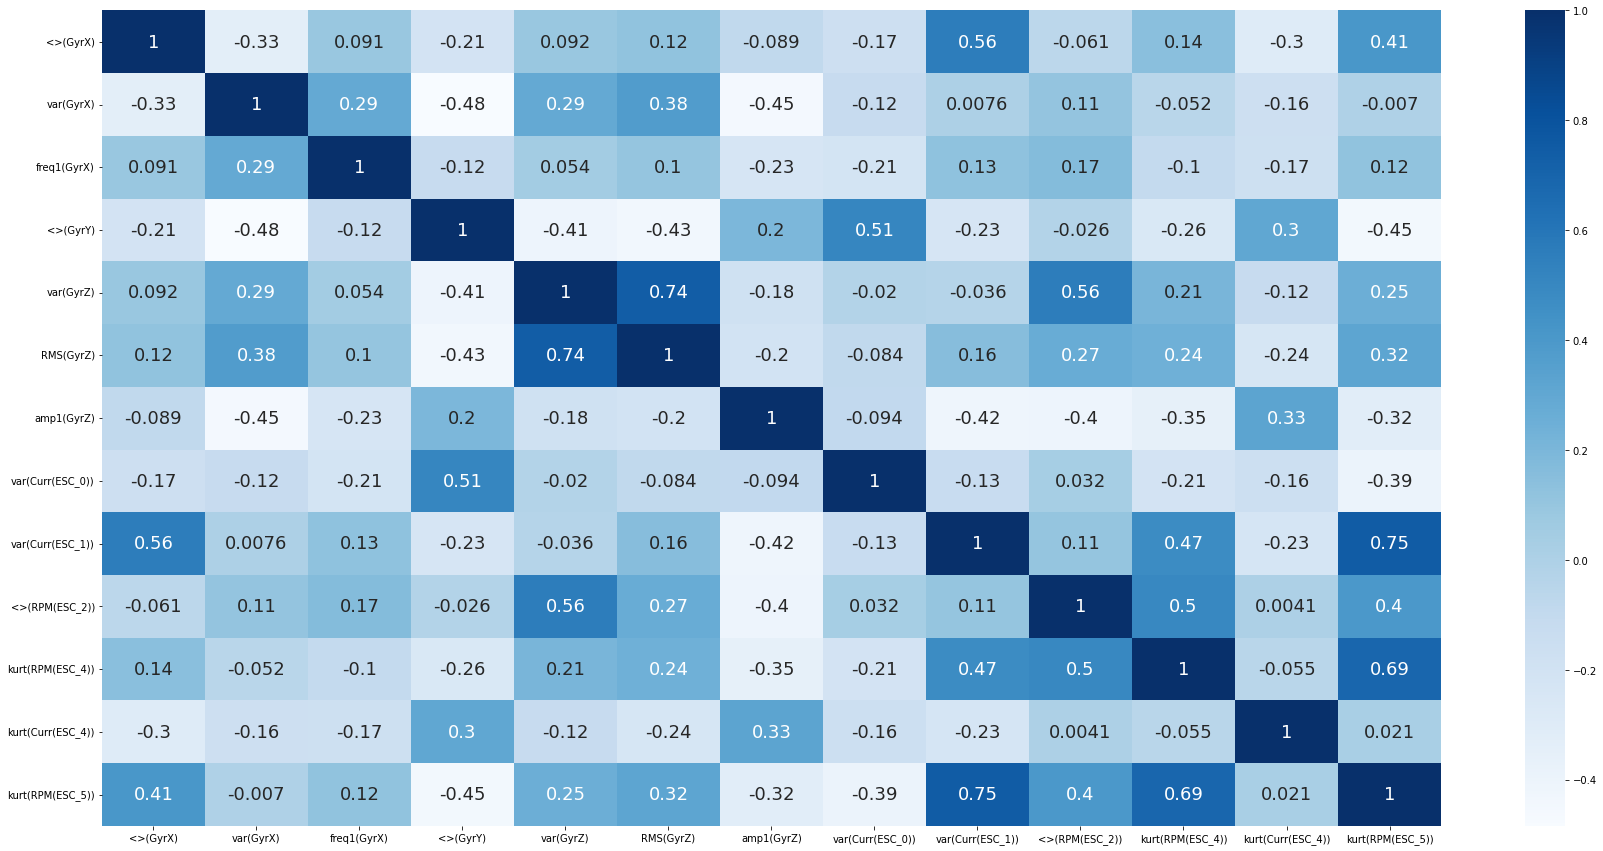

In [20]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(x[x.columns].corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

### Separazione del dataset in training e test

In [21]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1296, 13)
(324, 13)
(1296, 1)
(324, 1)


In [22]:
from sklearn.calibration import CalibratedClassifierCV

# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    SVC(probability=True),
    MLPClassifier(random_state=rs), # Multi Layer Perceptron
    SGDClassifier(random_state=rs) # Stochastic Gradient Descent 
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

### Classificazione

In [23]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)) # qui invece abbiamo cross validation
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) # accuratezza semplice con training e test
    train_pred = clf.predict(x_test)
    print(f'Cross-Validation: {cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold)}') 
    
    print(f'Accuracy: {acc} \t ---> {name} ')

    guasto_pred = pd.Series(model.predict(df_test), name='Guasto_test')
    conteggio = guasto_pred.value_counts()
    print(f'Test: {conteggio}')

    print("----------------------------------------------------")
    
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    
    i += 1

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


Cross-Validation: [0.81153846 0.79150579 0.81467181 0.80694981 0.78378378]
Accuracy: 0.82 	 ---> LogisticRegression 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.59615385 0.69498069 0.66409266 0.66409266 0.64864865]
Accuracy: 0.68 	 ---> SVC 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.38461538 0.32432432 0.53281853 0.32432432 0.37451737]
Accuracy: 0.67 	 ---> MLPClassifier 
Test: 2    1
Name: Guasto_test, dtype: int64
----------------------------------------------------
Cross-Validation: [0.54615385 0.6023166  0.54826255 0.32432432 0.33590734]
Accuracy: 0.4 	 ---> SGDClassifier 
Test: 1    1
Name: Guasto_test, dtype: int64
----------------------------------------------------


### Matrici di confusione

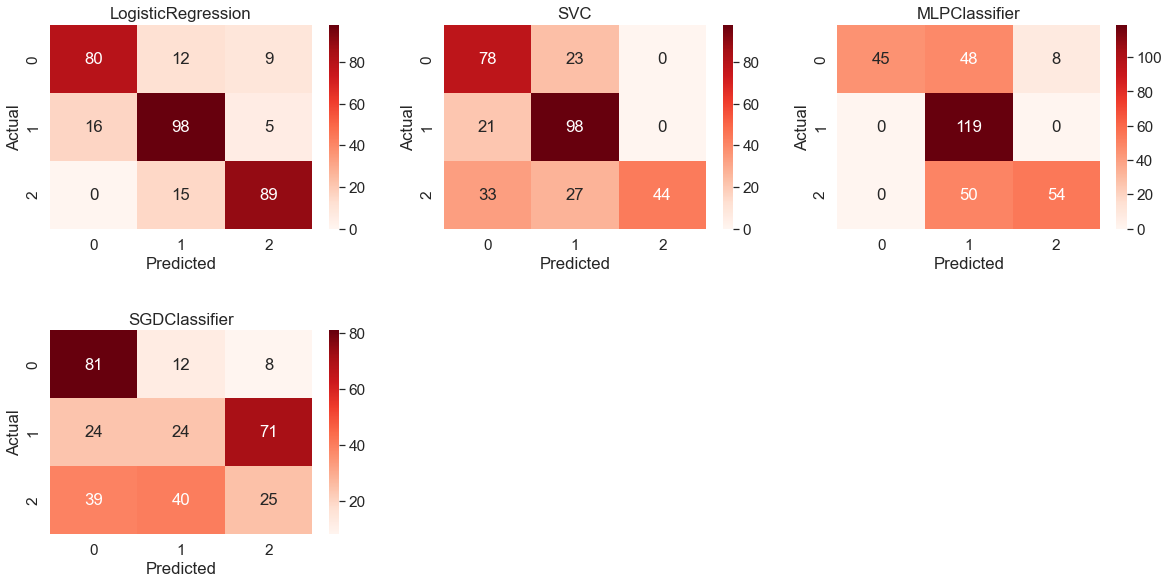

In [24]:
import seaborn as sns
# Confusion matrixes (not-normalized confusion matrix)
plt.figure(figsize=(20,15))
sns.set(font_scale=1.4)
for i in range(len(classifiers)):
    plt.subplot(3,3,i+1) #adjust this acourding to the number of algorithms
    sns.heatmap(cnfm[i], annot=True, fmt="d",cmap="Reds")
    plt.subplots_adjust(hspace = 0.5)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(clf_name[i])

In [ ]:
#Classification reports
for i in range(len(classifiers)):
    print (f"{clf_name[i]} Classification Report:" )
    print (clr[i])